<img src="../static/logopython.png" alt="Logo Python" style="width: 300px; display: inline"/>
<img src="../static/deimoslogo.png" alt="Logo Deimos" style="width: 300px; display: inline"/>

# Clase 10: Introducción a NumPy

_Hasta ahora hemos visto los tipos de datos más básicos que nos ofrece Python: integer, real, complex, boolean, list, tuple...  Pero ¿no echas algo de menos? Efectivamente, los __arrays__. _

_Durante esta clase nos adentraremos en el paquete NumPy: veremos como los arrays mejoran la eficiencia de nuestro código, aprenderemos a crearlos y a operar con ellos_.

## ¿Qué es un array? 

Un array es un __bloque de memoria que contiene elementos del mismo tipo__. Básicamente:

* nos _recuerdan_ a los vectores, matrices, tensores...
* podemos almacenar el array con un nombre y acceder a sus __elementos__ mediante sus __índices__.
* ayudan a gestionar de manera eficiente la memoria y a acelerar los cálculos.


---

| Índice     | 0     | 1     | 2     | 3     | ...   | n-1   | n  |
| ---------- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Valor      | 2.1   | 3.6   | 7.8   | 1.5   | ...   | 5.4   | 6.3 |

---

__¿Qué solemos guardar en arrays?__

* Vectores y matrices.
* Datos de experimentos:
    - En distintos instantes discretos.
    - En distintos puntos del espacio.
* Resultado de evaluar funciones con los datos anteriores.
* Discretizaciones para usar algoritmos de: integración, derivación, interpolación...
* ... 

## ¿Qué es NumPy?

NumPy es un paquete fundamental para la programación científica que __proporciona un objeto tipo array__ para almacenar datos de forma eficiente y una serie de __funciones__ para operar y manipular esos datos.
Para usar NumPy lo primero que debemos hacer es importarlo:

In [3]:
import numpy as np
#para ver la versión que tenemos instalada:
np.__version__

'1.11.0'

## Nuestro primer array

¿No decíamos que Python era fácil? Pues __creemos nuestros primeros arrays__:

In [2]:
import numpy as np

In [2]:
# Array de una dimensión
mi_primer_array = np.array([1, 2, 3, 4]) 
mi_primer_array

array([1, 2, 3, 4])

In [3]:
# Podemos usar print
print(mi_primer_array)

[1 2 3 4]


In [4]:
# Comprobar el tipo de mi_primer_array
type(mi_primer_array)

numpy.ndarray

In [9]:
# Comprobar el tipo de datos que contiene
mi_primer_array.dtype

dtype('int32')

In [11]:
# Si queremos cambiar el tipo de los elementos del array
otro_array = mi_primer_array.astype('int64')
otro_array.dtype

dtype('int64')

In [39]:
# Queremos saber sus dimensiones
mi_primer_array.shape

(4,)

In [40]:
# Y el número de elementos que contiene
mi_primer_array.size

4

In [41]:
# También hay funciones para lo mismo
print(np.shape(mi_primer_array))
print(np.size(mi_primer_array))

(4,)
4


<div class="alert alert-info"><strong>Nota:</strong> 
No vamos a entrar demasiado en qué son los métodos y qué las funciones, pero debes recordar que los métodos están asociados a la programación orientada a objetos y que en Python todo es un objeto. Los métodos son unas funciones especiales en las que el argumento más importante (sobre el que se realiza la acción) se escribe delante seguido de un punto. Por ejemplo: `<objeto>.método(argumentos)`
</div>

Los arrays de una dimensión se crean pasándole una lista como argumento a la función `np.array`. Para crear un array de dos dimensiones le pasaremos una _lista de listas_:

In [7]:
# Array de dos dimensiones
mi_segundo_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

<div class="alert alert-info">Podemos continuar en la siguiente línea usando `\`, pero no es necesario escribirlo dentro de paréntesis o corchetes</div>

Esto sería una buena manera de definirlo, de acuerdo con el [PEP 8 (indentation)](http://legacy.python.org/dev/peps/pep-0008/#indentation):

In [8]:
mi_segundo_array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ]) 

### Funciones y constantes de NumPy

Hemos dicho que NumPy también incorporá __funciones__. Un ejemplo sencillo:

In [13]:
# Suma
np.sum(mi_primer_array)

[1 2 3 4]


10

In [10]:
# Máximo
np.max(mi_primer_array)

4

In [11]:
# Seno
np.sin(mi_segundo_array)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ],
       [ 0.6569866 ,  0.98935825,  0.41211849]])

Y algunas __constantes__ que podemos neccesitar:

In [12]:
np.pi, np.e

(3.141592653589793, 2.718281828459045)

## Características de los arrays de NumPy

El objeto tipo array que proporciona NumPy (Python ya dispone de un tipo array que sirve para almacenar elementos de igual tipo pero no proporciona toda la artillería matemática necesaria como para hacer operaciones de manera rápida y eficiente) se caracteriza por:

### 1) Homogeneidad de tipo:

Comencemos viendo que ocurre con las __listas__:

In [14]:
lista = [ 1, 1+2j, True, 'aerodinamica', [1, 2, 3] ]
lista

[1, (1+2j), True, 'aerodinamica', [1, 2, 3]]

En el caso de los __arrays__:

In [15]:
array = np.array([ 1, 1+2j, True, 'aerodinamica'])
array

array(['1', '(1+2j)', 'True', 'aerodinamica'], 
      dtype='<U64')

__¿Todo bien? Pues no__. Mientras que en la lista cada elemento conserva su tipo, en el array, todos han de tener el mismo y NumPy ha considerado que todos van a ser string.

### 2) Tamaño fijo en el momento de la creación:

__¡Tranquilo!__ los __allocate__ son automáticos...

Igual que en el caso anterior, comencemos con la __lista__:

In [17]:
print(id(lista))
lista.append('fluidos')
print(lista)
print(id(lista))

1721240621384
[1, (1+2j), True, 'aerodinamica', [1, 2, 3], 'fluidos', 'fluidos']
1721240621384


In [18]:
print(id(array))
array = np.append(array, 'fluidos')
print(array)
print(id(array))

1721240769440
['1' '(1+2j)' 'True' 'aerodinamica' 'fluidos']
1721240770480


Si consultamos la ayuda de la función `np.append` escribiendo en una celda `help(np.append)` podemos leer:

    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that `append` does not occur in-place: a new array is allocated and filled.  If `axis` is None, `out` is a flattened array.

### 3) Eficiencia

Hasta el momento los arrays han demostrado ser bastante menos flexibles que las listas, luego olvidemos estos últimos 10 minutos y manejemos siempre listas... ¿no? ¡Pues no! Los arrays realizan una gestión de la memoria mucho más eficiente que mejora el rendimiento.

Prestemos atención ahora a la velocidad de ejecución gracias a la _función mágica_ `%%timeit`, que colocada al inicio de una celda nos indicará el tiempo que tarda en ejecutarse. 

In [19]:
lista = list(range(0,100000))
type(lista)

list

In [20]:
%%timeit
sum(lista)

100 loops, best of 3: 2.01 ms per loop


In [21]:
array = np.arange(0, 100000)

In [22]:
%%timeit
np.sum(array)

The slowest run took 7.40 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 50.1 µs per loop


Como ves, las mejoras en este caso son de 2 órdenes de magnitud. __NumPy nos ofrece funciones que se ejecutan prácticamente en tiempos de lenguaje compilado (Fortran, C, C++) y optimizado, pero escribiendo mucho menos código y con un nivel de abstracción mayor__. Conociendo una serie de buenas prácticas, podremos competir en velocidad con nuestros códigos en Python. Para casos en los que no sea posible, existen herramientas que nos permiten ejecutar desde Python nuestros códigos en otros lengujes como [f2py](http://docs.scipy.org/doc/numpy-dev/f2py/). Este tema puede resultarte algo avanzado a estas alturas, pero bastante útil; puedes consultar este [artículo de pybonacci](http://pybonacci.org/2013/02/22/integrar-fortran-con-python-usando-f2py/9) si lo necesitas.

## Funciones para crear arrays

¿Demasiada teoría? vayamos a la práctica. Ya hemos visto que la función `np.array()` nos permite crear arrays con los valores que nosotros introduzcamos manualmente a través de listas. Más adelante, aprenderemos a leer ficheros y almacenarlos en arrays. Mientras tanto, ¿qué puede hacernos falta?

#### array de ceros

In [23]:
# En una dimensión
np.zeros(100)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
# En dos dimensiones
np.zeros([10,10])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

<div class="alert alert-info"><strong>Nota:</strong> 
En el caso 1D es válido tanto `np.zeros([5])` como `np.zeros(5)` (sin los corchetes), pero no lo será para el caso nD
</div>

#### array "vacío"

In [25]:
np.empty(10)

array([  8.50405933e-312,   0.00000000e+000,   8.50407569e-312,
         8.50405944e-312,   8.50398854e-312,   8.50405943e-312,
         8.50403917e-312,   0.00000000e+000,   8.50378760e-312,
         6.36598737e-311])

<div class="alert alert-warning"><strong>Importante:</strong> 
El array vacío se crea en un tiempo algo inferior al array de ceros. Sin embargo, el valor de sus elementos será arbitrario y dependerá del estado de la memoria. Si lo utilizas asegúrate de que luego llenas bien todos sus elementos porque podrías introducir resultados erróneos.
</div>

#### array de unos

In [26]:
np.ones([3,2])

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

<div class="alert alert-info"><strong>Nota:</strong> 
Otras funciones muy útiles son `np.zeros_like` y `np.ones_like`. Usa la ayuda para ver lo que hacen si lo necesitas.
</div>

#### array identidad

In [27]:
np.identity(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

<div class="alert alert-info"><strong>Nota:</strong> 
`np.identity` es un caso particular de `np.eye`. Puedes probar esa función y también `np.diag`.
</div>

### Rangos

#### np.arange

NumPy, dame __un array que vaya de 0 a 5__:

In [26]:
a = np.arange(0, 5)
a

array([0, 1, 2, 3, 4])

__Mira con atención el resultado anterior__, ¿hay algo que deberías grabar en tu cabeza para simpre?
__El último elemento no es 5 sino 4__

NumPy, dame __un array que vaya de 0 a 10, de 3 en 3__:

In [27]:
np.arange(0,11,3)

array([0, 3, 6, 9])

#### np.linspace

Si has tenido que usar MATLAB alguna vez, seguro que esto te suena:

In [28]:
# linspace, genera números igualmente espaciados
np.linspace(0, 10, 21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

En este caso sí que se incluye el último elemento.

<div class="alert alert-info"><strong>Nota:</strong> 
También puedes probar `np.logspace()`, que hace lo mismo que `ng.linspace()` pero usa escala logarítmica
</div>

#### np.mgrid

In [42]:
# mgrid genera una meshgrid de Matlab
x, y = np.mgrid[0:5, 0:5]
print(x)
print(y)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


<div class="alert alert-info">Para los que vengan de Matlab, esto es lo mismo que <a href="http://es.mathworks.com/help/matlab/ref/meshgrid.html?requestedDomain=www.mathworks.com">meshgrid</a></div>

### reshape

Con `np.arange()` es posible crear "vectores" cuyos elementos tomen valores consecutivos o equiespaciados, como hemos visto anteriormente. ¿Podemos hacer lo mismo con "matrices"? Pues sí, pero no usando una sola función. Imagina que quieres crear algo como esto:

\begin{pmatrix}
    1 & 2 & 3\\ 
    4 & 5 & 6\\
    7 & 8 & 9\\
    \end{pmatrix}
    
* Comenzaremos por crear un array 1d con los valores $(1,2,3,4,5,6,7,8,9)$ usando `np.arange()`.
* Luego le daremos forma de array 2d. con `np.reshape(array, (dim0, dim1))`.

In [29]:
a = np.arange(1,10)
M = np.reshape(a, [3,3])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
# También funciona como método
N = a.reshape([3,3])
N

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Importación

Python es un lenguaje que está altamente modularizado: está dividido en __bibliotecas que realizan tareas específicas__. Para hacer uso de ellas debemos importarlas. Podemos importar cosas de la [biblioteca estándar](https://docs.python.org/3.4/library/), de paquetes que hayamos descargado (o se encuentren en [nuestra distribución](http://docs.continuum.io/anaconda/pkg-docs.html)) o de módulos que nosotros mismos construyamos. 

Existen varias formas de importar:

    import numpy
    
Cada vez que queramos acceder a una función de numpy, deberemos escribir:
    
    numpy.sin(5)
    numpy.linspace(0,100,50)
    
---
Como esto puede resultar tedioso, suele utilizarse un __namespace__, el recomendado en la documentación oficial y que usaremos en el curso es:

    import numpy as np
    
Ahora podremos llamar a funciones escribiendo:

    np.sin(5)
    np.linspace(0,100,50)
    
---
Si esto te sigue pareciendo demasido escribir puedes hacer (__altamente no recomendado__):

    from numpy import *
    
El asterisco, quiere decir _TODO_. Esto genera varios problemas: 

* __Importará gran cantidad de funciones y clases que puede que no necesites__.
* El nombre de estas funciones, puede coincidir con el de alguna de otro módulo que hayas importado, de manera que "la machacará", por lo que __se producirán ambigüedades__.

##### Ejemplo: ¿por qué no hacer from numpy import * ?

In [36]:
from numpy import *

a = [1,2,3,4,5]
sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

In [37]:
from math import *

sin(a)

TypeError: a float is required

__La función seno que incorporá math no es la misma que la de NumPy__. Ambas proporcionarán el seno de un número, evidentemente, el mismo resultado para el mismo número, pero una acepta listas y la otra no. Al hacer la segunda importación, la función seno de NumPy se ha sustituido por la de math y la misma sentencia, da un error. Esto puede hacer que te vuelvas un poco loco si tu código es grande o acabes volviendo loco a alguien si usa tu código.

¿Suficiente? Ahora ya sabes por qué tendrás que escribir `np.loquesea` __siempre__.

<div class="alert alert-warning"><strong>Importante:</strong> Reiniciemos el kernel e importemos bien NumPy para continuar.</div>

In [1]:
import numpy as np

Hablando de funciones que pueden colisionar con otras del mismo nombre en diferentes librerías. También numpy incluye una función __random__

In [43]:
from numpy import random

# números aleatorios entre 0 y 1
print(random.rand(5,5))

# Siguiendo distribución normal
print(random.randn(5,5))

[[ 0.09499138  0.6403411   0.90209563  0.42203589  0.13916212]
 [ 0.05320965  0.68019828  0.44473688  0.9543818   0.27127504]
 [ 0.25881467  0.23817616  0.82439646  0.72909659  0.96532595]
 [ 0.78538195  0.91555639  0.30059511  0.06472608  0.81556726]
 [ 0.16651364  0.18051796  0.50874504  0.17013189  0.92894754]]
[[ 0.57814252  0.10722637 -0.11887964 -0.99845077 -1.64892865]
 [-0.66516487  0.69173522  1.22952341  1.70343018 -0.92764223]
 [ 0.93319464 -0.85638804 -0.94667834  0.05560207 -0.29197863]
 [-0.54352555 -0.29860831 -0.80256285  0.0673178   0.95351699]
 [ 1.47384134  0.85076513 -0.60515473  1.37897088 -2.79104732]]


## Operaciones

### Operaciones elemento a elemento

Ahora que pocas cosas se nos escapan de los arrays, probemos a hacer algunas operaciones. El funcionamiento es el habitual en FORTRAN y MATLAB y poco hay que añadir:

In [31]:
#crear un array y y sumarle un número
arr = np.arange(11)
arr + 55

array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [32]:
#multiplicarlo por un número
arr * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [33]:
#elevarlo al cuadrado
arr ** 2

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [34]:
#calcular una función
np.tanh(arr)

array([ 0.        ,  0.76159416,  0.96402758,  0.99505475,  0.9993293 ,
        0.9999092 ,  0.99998771,  0.99999834,  0.99999977,  0.99999997,  1.        ])

<div class="alert alert-info"><strong>Entrenamiento:</strong> 
Puedes tratar de comparar la diferencia de tiempo entre realizar la operación en bloque, como ahora, y realizarla elemento a elemento, recorriendo el array con un bucle.
</div>

__Si las operaciones involucran dos arrays también se realizan elemento a elemento__

In [35]:
#creamos dos arrays
arr1 = np.arange(0,11)
arr2 = np.arange(20,31)

In [36]:
#los sumamos
arr1 + arr2

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])

In [37]:
#multiplicamos
arr1 * arr2

array([  0,  21,  44,  69,  96, 125, 156, 189, 224, 261, 300])

#### Comparaciones

In [9]:
# >,<
arr1 > arr2

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

In [10]:
# ==
arr1 == arr2 # ¡ojo! los arrays son de integers, no de floats

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

<div class="alert alert-info"><strong>Nota:</strong> 
Por cierto, ¿qúe ocurrirá si los arrays con los que se quiere operar no tiene la misma forma? ¿apuestas? Quizá más adelante te interese buscar algo de información sobre <a href="http://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/">__broadcasting__</a>.
</div>

## Trabajando con ficheros

En numpy podemos leer datos de ficheros, y escribir datos en ficheros también. El formato más habitual con el que trabajaremos será CSV (*comma-separated values*), o la variante TSV (*tab-separated values*)

### Ficheros CSV

Los leemos con la función <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html">numpy.genfromtxt</a>

In [44]:
# Mostramos las primeras líneas del fichero que vamos a cargar
!head stockholm_td_adj.tsv

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [78]:
# Cargamos los datos en un array de numpy
data = np.genfromtxt('stockholm_td_adj.tsv')

In [47]:
# Mostramos sus dimensiones
data.shape

(77431, 7)

Y lo podemos graficar con matplotlib, si queremos

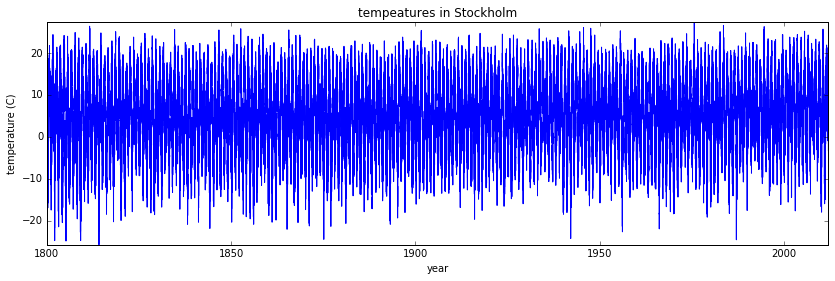

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Mediante el uso de [numpy.savetxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html), podemos guardar tabién datos en un fichero en formato CSV

In [51]:
# Generamos matriz de numeros aleatorios
M = random.rand(3,3)
print(M)

[[ 0.62613955  0.09533225  0.71161022]
 [ 0.31906951  0.71655236  0.32715612]
 [ 0.16584972  0.43603687  0.03343476]]


In [52]:
# La guardamos
np.savetxt("random_matrix.csv", M)

In [53]:
# La mostramos
!cat random_matrix.csv

6.261395453406514156e-01 9.533225220334984318e-02 7.116102190680657635e-01
3.190695134641344799e-01 7.165523626369012522e-01 3.271561168049706980e-01
1.658497180219530298e-01 4.360368698148580080e-01 3.343475964438302750e-02


In [54]:
# También podemos especificar el formato para las celdas al guardar
np.savetxt("random_matrix.csv", M, fmt="%.5f")

!cat random_matrix.csv

0.62614 0.09533 0.71161
0.31907 0.71655 0.32716
0.16585 0.43604 0.03343


### Formato nativo de numpy

Numpy tiene su propio formato nativo binario también. Lo podemos usar con [numpy.save](http://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) y [numpy.load](http://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html)

In [56]:
# Salvamos la matriz en formato interno de numpy
np.save("random-matrix.npy", M)

!file random-matrix.npy

random-matrix.npy: data


In [58]:
# Cargamos fichero
np.load("random-matrix.npy")

array([[ 0.62613955,  0.09533225,  0.71161022],
       [ 0.31906951,  0.71655236,  0.32715612],
       [ 0.16584972,  0.43603687,  0.03343476]])

## Indexación de arrays

Indexamos elementos, como ya sabemos, usando corchetes e índices

In [11]:
v = np.array([1,2,3,4])

v[0]

1

In [ ]:
M = np.array([[1, 2], [3, 4]])

print(M[1, 1])
print(M[1])
print(M[1, :])
print(M[:,1])

<div class="alert alert-info">Para la indexación de vectores y arrays, aplican las reglas que ya conocemos. Para cada dimensión: [start:stop:step]</div>

También podemos usar comprehensions para indexar

In [18]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

O podemos aplicar máscaras

In [21]:
B = np.array([n for n in range(5)])
print(B)

row_mask = np.array([True, False, True, False, False])
print(B[row_mask])

[0 1 2 3 4]
[0 2]


Las máscaras son muy interesantes para seleccionar condicionalmente elementos de un array

In [23]:
x = np.arange(0, 10, 0.5)
print(x)

mask = (5 < x) * (x < 7.5)
print(mask)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
[False False False False False False False False False False False  True
  True  True  True False False False False False]


## Extracción de datos y creación de arrays

Veamos algunas funciones útiles para la creación de arrays

### where

La máscara anterior la podemos transformar en un array posicional mediante el uso de where

In [26]:
indices = np.where(mask)

print(mask)
print(indices)

print(x[indices])
print(x[mask])

[False False False False False False False False False False False  True
  True  True  True False False False False False]
(array([11, 12, 13, 14]),)
[ 5.5  6.   6.5  7. ]
[ 5.5  6.   6.5  7. ]


### diag

Sirve para extraer la diagonal de un array

In [28]:
# Matriz diagonal
print(np.diag([1,2,3]))

# Matriz diagonal con offset
print(np.diag([1,2,3], k=1))

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]
 [0 0 0 0]]


### take

Es similar a algo que ya hemos visto

In [29]:
v2 = np.arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [30]:
row_indices = [1, 3, 5]
v2[row_indices] 

array([-2,  0,  2])

In [31]:
v2.take(row_indices)

array([-2,  0,  2])

También funciona en listas normales

In [33]:
np.take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

Elige elementos de varios arrays

In [80]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

choose(which, choices)

array([ 5, -2,  5, -2])

In [ ]:
v2 = arange(-3,3)
v2

## Álgebra lineal

La vectorización de código es clave para realizar cálculos numéricos eficientes con Numpy. Siempre que nos sea posible, deberíamos formular nuestros programas en términos de operaciones sobre matrices y vectores

### Operaciones entre escalares y arrays

Podemos hacer las operaciones aritméticas habituales mezclando arrays y escalares

In [34]:
v1 = np.arange(0, 5)

In [35]:
v1 * 2

array([0, 2, 4, 6, 8])

In [36]:
v1 + 2

array([2, 3, 4, 5, 6])

In [37]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]), array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Operaciones elemento a elemento entre matrices

Cuando realizamos operaciones aritméticas de un array consigo mismo, el comportamiento por defecto es __realizarlas elemento a elemento__

In [47]:
print(A)

A * A # el termino en ingles es element-wise

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [43]:
print(v1)
v1 * v1

[0 1 2 3 4]


array([ 0,  1,  4,  9, 16])

Si multiplicamos arrays con dimensiones compatibles, también es elemento a elemento

In [42]:
A.shape, v1.shape

((5, 5), (5,))

In [48]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Álgebra de matrices

Mediante `dot`, podemos hacer multiplicación de matrices

In [49]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [50]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [51]:
np.dot(v1, v1)

30

También podemos hacer casting al tipo `matrix`. Eso cambia el comportamiento de los operadores `+, -, *` para usar álgebra matricial

In [53]:
M = np.matrix(A)
v = np.matrix(v1).T # vector columna

In [54]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [55]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [56]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [57]:
v.T * v

matrix([[30]])

In [58]:
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

Si intentamos operar entre elementos con dimensiones no compatibles, nos da error

In [60]:
v = np.matrix([1,2,3,4,5,6]).T

In [62]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [63]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

### Transformaciones de arrays y matrices

Hemos usado `T` para transponer `v`. También se puede usar `transpose`. Y hay más operaciones disponibles:

In [64]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [65]:
np.conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Conjugado Hermitiano: transpuesta + conjugada

In [66]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

Podemos extraer las partes real e imaginaria de componentes complejos de matrices

In [67]:
np.real(C) # igual que: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [68]:
np.imag(C) # igual que: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

O el equivalente al `arg` de MATLAB

In [69]:
np.angle(C+1)

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [71]:
np.abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Operaciones sobre matrices

#### Inversa

In [72]:
np.linalg.inv(C)

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [73]:
C.I * C

matrix([[  1.00000000e+00+0.j,   4.44089210e-16+0.j],
        [  0.00000000e+00+0.j,   1.00000000e+00+0.j]])

#### Determinante

In [75]:
np.linalg.det(C)

(2.0000000000000004+0j)

In [76]:
np.linalg.det(C.I)

(0.50000000000000011+0j)

### Procesamiento de datos

Como ya hemos visto, se pueden almacenar datasets en arrays de Numpy, igual que hacemos con Matlab. Veamos algunos ejemplos

In [80]:
# en data están las temperaturas
np.shape(data)

(77431, 7)

#### media

In [82]:
# la temperatura está en la columna 3
np.mean(data[:,3])

6.1971096847515854

Eso nos dice que la temperatura media en Estocolmo en los últimos 200 años ha sido 6.2ºC

#### desviación estándar y varianza

In [83]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

#### máximo y mínimo

In [84]:
# Media diaria más baja
data[:,3].min()

-25.800000000000001

In [85]:
# Media diaria más alta
data[:,3].max()

28.300000000000001

#### Suma, producto, acumulaciones

In [86]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [87]:
np.sum(d)

45

In [88]:
np.prod(d+1)

3628800

In [89]:
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [90]:
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [91]:
# lo mismo que diag(A).sum()
np.trace(A)

110

### Operaciones en submatrices

Podemos operar en subconjuntos de nuestros datos mediante las técnicas de extracción e indexación que ya conocemos. 

Por ejemplo, volvamos al dataset de temperaturas

In [92]:
!head -n 3 stockholm_td_adj.tsv

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


El formato de datos es: año, mes, día, temperatura media diaria, mínima, máxima, localización

Imaginemos que queremos la temperatura media de un mes concreto. Por ejemplo, Febrero. Podríamos obtenerla con una máscara que seleccione solo los datos de ese mes en particular:

In [94]:
np.unique(data[:,1])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [95]:
mask_feb = data[:,1] == 2

In [97]:
# La temperatura está en la columna 3
np.mean(data[mask_feb,3])

-3.2121095707365961

Con esta técnica podríamos graficar las temperaturas medias mensuales para cada mes del año: 

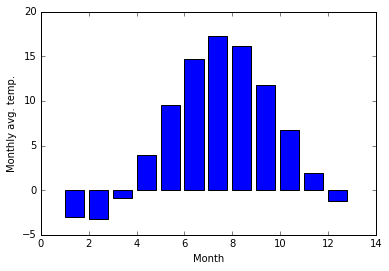

In [100]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Cálculos en varias dimensiones

Las funciones `min` y `max`, entre otras, pueden ser aplicadas a filas o columnas concretas de alguna matriz. Para ello, podemos usar `axis`:

In [102]:
m = np.random.rand(3,3)
m

array([[ 0.60295329,  0.1687646 ,  0.00522809],
       [ 0.94989809,  0.51278445,  0.30133676],
       [ 0.44969398,  0.24268553,  0.49089883]])

In [104]:
# max global
m.max()

0.94989808774678197

In [105]:
# max por columna
m.max(axis=0)

array([ 0.94989809,  0.51278445,  0.49089883])

In [106]:
# max por fila
m.max(axis=1)

array([ 0.60295329,  0.94989809,  0.49089883])

Hay más funciones que aceptan el parámetro `axis`. Se puede consultar la documentación para ello

## Enredando con los arrays...

Podemos generar copias de un array modificando sus dimensiones. Ya hemos visto antes que `shape` y `reshape` se usaban para eso...

In [107]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [108]:
n, m = A.shape

In [109]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [110]:
B[0,0:5] = 5 # aqui estamos modificando el array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [111]:
A # La variable original también ha cambiado

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Mediante la función `flatten`, podemos aplanar un array.

In [137]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [112]:
B[0:5] = 10

B

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10]])

In [113]:
A # Ahora A no ha cambiado porque B es una copia modificada de A, no un puntero al contenido de A

array([[10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10]])

## Añadiendo nuevas dimensiones a un array: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

Con `newaxis` podemos añadir nuevas dimensiones a un array.

In [117]:
v = np.array([1,2,3])
print(v)

[1 2 3]


In [119]:
np.shape(v)

(3,)

In [121]:
# Creamos matriz columna
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [123]:
v[:,np.newaxis].shape

(3, 1)

In [124]:
# Matriz fila
v[np.newaxis,:].shape

(1, 3)

## Concatenando y apilando arrays

Mediante el uso de funciones como `repeat`, `tile`, `vstack`, `hstack`, y `concatenate` we can create larger vectors and matrices from smaller ones:

### tile y repeat

In [127]:
a = np.array([[1, 2], [3, 4]])

In [128]:
# repite cada elemento 3 veces
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [129]:
# otro tipo de repetición
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenar

In [131]:
b = np.array([[5, 6]])

In [132]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [133]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack y vstack

In [136]:
print(a)
print(b)
np.vstack((a,b))

[[1 2]
 [3 4]]
[[5 6]]


array([[1, 2],
       [3, 4],
       [5, 6]])

In [135]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copia profunda

En Python, la mayor parte de las asignaciones son por referencia, por razones de rendimiento. 

In [138]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [139]:
# B apunta al mismo sitio que A
B = A 

In [140]:
# Si cambiamos B, cambiamos A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [141]:
A

array([[10,  2],
       [ 3,  4]])

Para evitar este comportamiento, debemos hacer una *copia profunda* del objeto. Lo podemos conseguir mediante la función `copy`

In [143]:
B = np.copy(A)

In [144]:
# Ahora si cambiamos B, A no se modifica
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [145]:
A

array([[10,  2],
       [ 3,  4]])

## Venga vale... también se pueden hacer iteraciones

Generalmente es una buena idea, en lenguajes interpretados como Python o Matlab, evitar las iteraciones, porque son demasiado lentas en comparación con las operaciones vectorizadas equivalentes.

Aun así, es posible que nos veamos obligados en algún momento a hacer una iteración. Recordemos muy rápidamente las iteraciones en Python

In [147]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [148]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


La sentencia `enumerate` es especialmente útil cuando se trabaja con vectores: 

In [149]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # Actualizamos M accediendo mediante índices
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [150]:
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizando funciones

Si es posible, vectorizando nuestros algoritmos podemos llegar a conseguir grandes mejoras de rendimiento. 

Si quisiéramos vectorizar un algoritmo escalar, deberíamos empezar comprobando qué sucede si le pasamos entradas vectoriales en lugar de escalares.

In [151]:
def Theta(x):
    """
    Implementación escalar de la función escalón de Heaviside
    https://es.wikipedia.org/wiki/Funci%C3%B3n_escal%C3%B3n_de_Heaviside
    """
    if x >= 0:
        return 1
    else:
        return 0

In [153]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Hemos obtenido un error, porque la función `Theta` no está pensada para trabajar con una entrada de tipo vectorial. Y la función [`vectorize`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html) de Numpy nos puede ayudar.

In [154]:
Theta_vec = np.vectorize(Theta)

In [156]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

Por supuesto, también podemos implementarlo nosotros

In [157]:
def Theta(x):
    """
    Implementación "vector-aware" de la misma función
    """
    return 1 * (x >= 0)

In [158]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [159]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Usando arrays en condicionales

Podemos usar arrays en sentencias condicionales, mediante el uso de `any` y `all`, que requieren que alguno o todos los elementos del array evalúen a True:

In [160]:
M

array([[ 1,  4],
       [ 9, 16]])

In [161]:
if (M > 5).any():
    print("Hay al menos un elemento mayor que 5 en la matriz")
else:
    print("Todos los elementos de la matriz son menores o iguales a 5")

Hay al menos un elemento mayor que 5 en la matriz


In [163]:
if (M > 5).all():
    print("Todos los elementos de la matriz son mayores que 5")
else:
    print("No todos los elementos de la matriz son mayores que 5")

No todos los elementos de la matriz son mayores que 5


## Casting de tipos

Recordemos que los arrays de Numpy tienen tipado estático. Aun así, podemos hacer casting explícito a otro tipo mediante `astype`:

In [164]:
M.dtype

dtype('int64')

In [165]:
M2 = M.astype(float)

M2

array([[  1.,   4.],
       [  9.,  16.]])

In [166]:
M2.dtype

dtype('float64')

In [167]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

---

__¡Quiero más!__

Algunos enlaces en Pybonacci:

* [Cómo crear matrices en Python con NumPy](http://pybonacci.wordpress.com/2012/06/11/como-crear-matrices-en-python-con-numpy/).
* [Números aleatorios en Python con NumPy y SciPy](http://pybonacci.wordpress.com/2013/01/11/numeros-aleatorios-en-python-con-numpy-y-scipy/).


Algunos enlaces en otros sitios:

* [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html). Es posible que de momento sólo sepas hacer los primeros
* [NumPy and IPython SciPy 2013 Tutorial](http://conference.scipy.org/scipy2013/tutorial_detail.php?id=100).
* [NumPy and SciPy documentation](http://docs.scipy.org/doc/).
* [Numpy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)

---

Clase en vídeo, parte del [Curso de Python para científicos e ingenieros](http://cacheme.org/curso-online-python-cientifico-ingenieros/) grabado en la Escuela Politécnica Superior de la Universidad de Alicante.

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("UltVlYCacD0", width=560, height=315, list="PLGBbVX_WvN7bMwYe7wWV5TZt1a58jTggB")

---

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso-AeroPython-UC3M/" data-text="Aprendiendo Python con" data-via="AeroPython" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo y Jorge Arévalo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [169]:
%%html
<a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [168]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())